## Importing Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
import statsmodels.api as sm
from scipy import stats

warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv("https://query.data.world/s/iewnhqlesh4ssr6ambor37vmbrclsm?dws=00000")



In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
kcuh = df

## Explorartory Data Analysis

In [5]:
df.shape

(6405008, 18)

can you create a new feature based on given feature.
1. Distance 
2. Duratio 
3. You can perform Time series analysis 


In [6]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [8]:
df['duration'] =   df["tpep_dropoff_datetime"] - df['tpep_pickup_datetime']

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [10]:
df['duration'] = round(df['duration'].dt.total_seconds()/60, 2)

In [91]:
data = df[['passenger_count', "payment_type", "fare_amount","trip_distance", "duration" ]]

## Check Missing value 

In [35]:
data.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.80
1,1.0,1.0,7.0,1.2,7.42
2,1.0,1.0,6.0,0.6,6.18
3,1.0,1.0,5.5,0.8,4.85
4,1.0,2.0,3.5,0.0,2.30


In [36]:
data.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [37]:
data.isnull().mean() * 100

passenger_count    1.021716
payment_type       1.021716
fare_amount        0.000000
trip_distance      0.000000
duration           0.000000
dtype: float64

In [92]:
data.dropna(inplace=True)

In [93]:
data["passenger_count"] = data["passenger_count"].astype('int64')
data['payment_type'] = data['payment_type'].astype('int64')

In [40]:
data[data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.00
2441,1,1,52.0,0.00,0.20
2446,2,1,9.5,1.70,13.07
2465,1,1,4.0,0.40,3.08
3344,1,1,6.0,1.20,5.35
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.80
6339559,1,1,8.5,1.81,8.02
6339560,1,2,6.5,0.98,6.90
6339562,1,1,11.0,2.10,14.23


In [94]:
data.drop_duplicates(inplace=True)

Distribution of passanger count 

In [42]:
data['passenger_count'].value_counts()

passenger_count
1    1750518
2     572547
3     199602
5     189305
6     118124
4     108422
0      69280
7         28
9         18
8         17
Name: count, dtype: int64

In [95]:
data['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [44]:
data['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [96]:
data = data[data['payment_type'] < 3]
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] < 6)]

In [97]:
data['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)

In [47]:
data.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.2,4.80
1,1,Card,7.0,1.2,7.42
2,1,Card,6.0,0.6,6.18
3,1,Card,5.5,0.8,4.85
4,1,Cash,3.5,0.0,2.30


In [48]:
data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260032e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770370e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.880000e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573000e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.337000e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525120e+03


Fare_amount can't be negative same goes with trip_distance and duration 

In [98]:
data = data[data['fare_amount'] > 0]
data = data[data['trip_distance'] > 0]
data = data[data['duration'] > 0]

(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

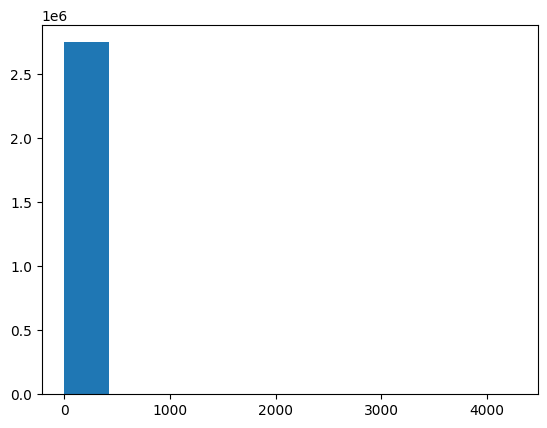

In [50]:
plt.hist(data['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x3575e0610>,
 'caps': [<matplotlib.lines.Line2D at 0x3575e0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x3575e03d0>],
 'medians': [<matplotlib.lines.Line2D at 0x3575e1090>],
 'fliers': [<matplotlib.lines.Line2D at 0x3575e1330>],
 'means': []}

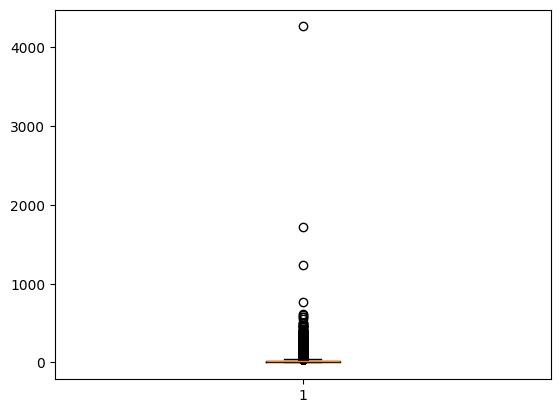

In [51]:
plt.boxplot(data['fare_amount'])

TO remove the outlier we gonna use Interquaritle range. 

In [52]:
data.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.80
1,1,Card,7.0,1.20,7.42
2,1,Card,6.0,0.60,6.18
3,1,Card,5.5,0.80,4.85
5,1,Cash,2.5,0.03,0.88


In [99]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1  
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [54]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.80
1,1,Card,7.0,1.20,7.42
2,1,Card,6.0,0.60,6.18
3,1,Card,5.5,0.80,4.85
5,1,Cash,2.5,0.03,0.88
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.38
6339555,3,Card,10.0,2.09,14.80
6339561,1,Card,17.5,4.11,21.50
6339563,1,Card,13.0,2.13,19.00


Base on fare amount and trip distance does customer prefer to pay by card or cash. For this we'll plot histogram 

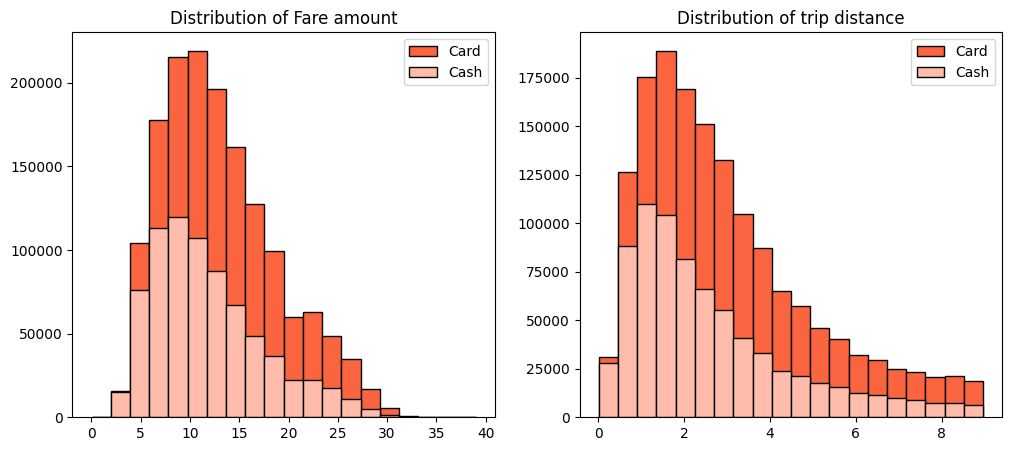

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data[data['payment_type'] == "Card"]['fare_amount'], histtype='barstacked', bins=20, edgecolor = "k", color='#FA643f', label='Card')
plt.hist(data[data['payment_type'] == "Cash"]['fare_amount'], histtype='barstacked', bins=20, edgecolor = "k", color='#FFBCAB', label='Cash')
plt.title("Distribution of Fare amount")
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(data[data['payment_type'] == "Card"]['trip_distance'], histtype='barstacked', bins=20, edgecolor = "k", color='#FA643f', label='Card')
plt.hist(data[data['payment_type'] == "Cash"]['trip_distance'], histtype='barstacked', bins=20, edgecolor = "k", color='#FFBCAB', label='Cash')
plt.title("Distribution of trip distance")
plt.legend()
plt.show()

In [60]:
data.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.111787  5.848618      2.992088  1.992633
Cash           11.757439  5.612380      2.602071  1.913590

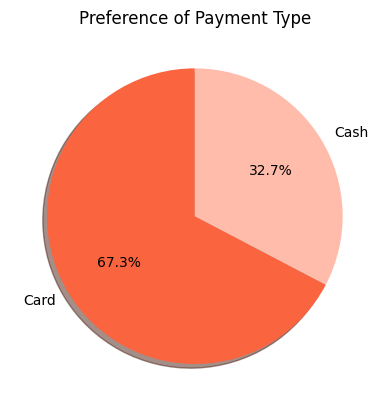

In [62]:
plt.title('Preference of Payment Type')
plt.pie(data['payment_type'].value_counts(normalize=True), labels=data['payment_type'].value_counts().index, startangle=90, 
        shadow=True, autopct = '%1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

In [70]:
data.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         909176
             2                         327657
             3                         122405
             4                          63675
             5                         124039
Cash         1                         460530
             2                         155466
             3                          54505
             4                          32714
             5                          47624

In [67]:
passenger_count = data.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [71]:
passenger_count['perc'] = (passenger_count['count']/ passenger_count['count'].sum()) * 100

In [72]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909176,39.567393
1,Card,2,327657,14.259652
2,Card,3,122405,5.327073
3,Card,4,63675,2.771140
4,Card,5,124039,5.398185
5,Cash,1,460530,20.042293
6,Cash,2,155466,6.765889
7,Cash,3,54505,2.372061
8,Cash,4,32714,1.423715
9,Cash,5,47624,2.072599


In [87]:
data = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
data['payment_type'] = ['Card', 'Cash']
data.iloc[0, 1:] = passenger_count.iloc[0:5, -1]
data.iloc[1, 1:] = passenger_count.iloc[5:, -1]
data

,payment_type,1,2,3,4,5
0,Card,39.567393,14.259652,5.327073,2.77114,5.398185
1,Cash,20.042293,6.765889,2.372061,1.423715,2.072599


In [89]:
# fig, ax = plt.subplots(figsize=(20, 6))

# # Ensure 'payment_type' is the index and data contains the relevant columns
# data.set_index('payment_type', inplace=True)  
# data.plot(kind='barh', stacked=True, ax=ax, color=['#FA643F', '#FFBCAB', '#F1F1F1', '#FD9F9F'])

# # Add Percentage Text
# for container in ax.containers:
#     for bar in container:
#         width = bar.get_width()
#         height = bar.get_height()
#         x, y = bar.get_xy()
#         percentage = (width / sum([bar.get_width() for bar in container])) * 100
#         ax.text(x + width / 2, 
#                 y + height / 2, 
#                 '{:.0f}%'.format(percentage), 
#                 horizontalalignment='center', 
#                 verticalalignment='center',
#                 color='black')


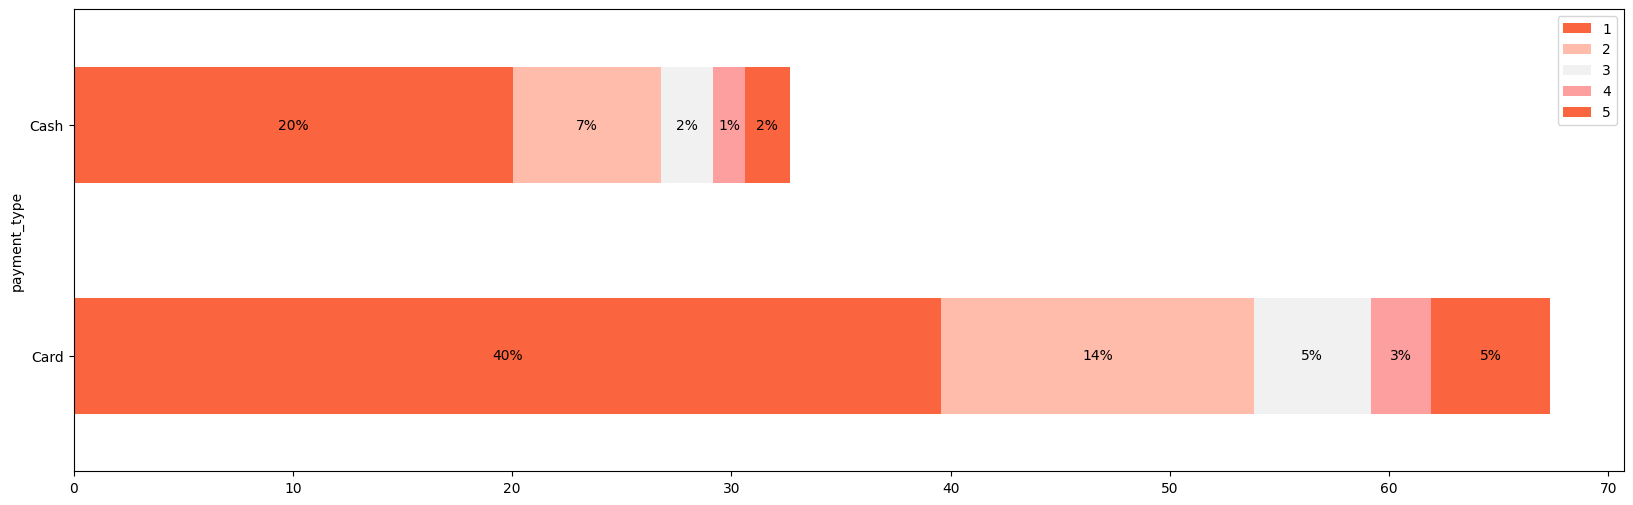

In [88]:
fig, ax = plt.subplots(figsize=(20, 6))

# Assuming 'data' has 'payment_type' as a column and other relevant columns for stacking
data.plot(x='payment_type', kind='barh', stacked=True, ax=ax, color=['#FA643F', '#FFBCAB', '#F1F1F1', '#FD9F9F'])

# Add Percentage Text
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center')


**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use Cash. 


**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash. 

Now we have choose which test we gonna perform. data we have which is fare amount which customer are paying from card which is sample one and which are using Cash they are Customer2 these two are independent sample which we have to compare. 

Fare amount is a continuous vlaue so, won't be able to use Chi-sqare. We use ANOVA when we have more than two groups now we have Z-test and T-test 
Reqirement for Z-test which large dataset population std should be known and dataset should be normally distributed. 
So, we gonna use t-test. to prove our point. 

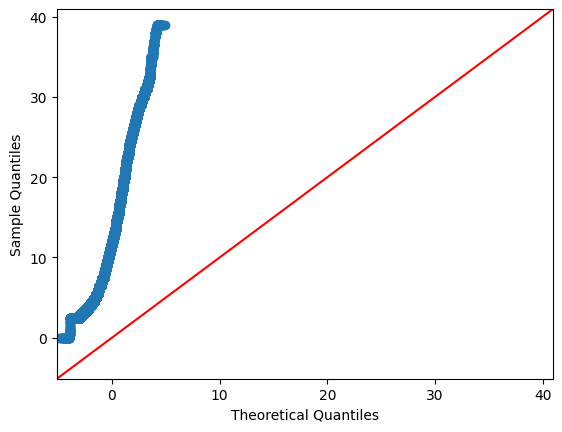

In [100]:
# Plot QQ plot. 
sm.qqplot(data['fare_amount'], line='45')
plt.show()

In [105]:
card_sample = data[data['payment_type'] == 'Card']['fare_amount']
cash_sample = data[data['payment_type'] == 'Cash']['fare_amount']

In [106]:
t_stats, p_value = stats.ttest_ind(a = card_sample, b = cash_sample, equal_var=False)
print('T statistic', t_stats, 'P_value', p_value)

T statistic 169.20952744948667 P_value 0.0


Regression Analysis on duration or fare amount. 